## 1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product

%matplotlib inline
import warnings 

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
brent_data = pd.read_csv('my_BRENT2019.csv', index_col=[0])
brent_data.sort_index(inplace=True)
brent_data.index = pd.to_datetime(brent_data.index)
brent_data

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,59.59,2019,8,27,3,239,35,1,0,0,0
2019-08-28,59.84,2019,8,28,3,240,35,2,0,0,0
2019-08-29,60.37,2019,8,29,3,241,35,3,0,0,0


In [3]:
brent_data['d_brent'] = brent_data['Значение'].diff(1)

## 3. сделайте ее перрасчет (ресемплинг) в представление по неделям

In [4]:
brent_data_w= brent_data.resample('W').mean()
brent_data_w

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,d_brent
Дата,,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.200000,0.000000,0.065000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.000000,0.166667,0.288333
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.000000,0.000000,-0.021667
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.000000,0.000000,0.118333
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.000000,0.000000,0.791667
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-04,62.791667,2019.0,7.500000,16.166667,3.000000,212.666667,31.0,2.666667,0.000000,0.000000,0.000000,-0.286667
2019-08-11,58.236667,2019.0,8.000000,7.666667,3.000000,219.666667,32.0,2.666667,0.000000,0.000000,0.000000,-0.510000
2019-08-18,59.033333,2019.0,8.000000,14.666667,3.000000,226.666667,33.0,2.666667,0.000000,0.000000,0.000000,0.103333


## 4. Добавьте первые разности по стоимости доллара и евро к рублю.

In [5]:
rur_usd = pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx', index_col=[1])
rur_usd.drop(columns=['nominal', 'cdx'], inplace=True)
rur_usd.rename(columns={'curs':'rurusd'},inplace=True)
rur_usd.index = pd.to_datetime(rur_usd.index)
rur_usd.head()

,rurusd
data,
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [6]:
rur_euro = pd.read_excel('R_E01_09_2010_T01_09_2019.xlsx', index_col=[1])
rur_euro.drop(columns=['nominal', 'cdx'], inplace=True)
rur_euro.rename(columns={'curs':'rureuro'},inplace=True)
rur_euro.index = pd.to_datetime(rur_euro.index)
rur_euro

,rureuro
data,
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720
...,...
2019-08-27,73.3955
2019-08-28,73.6091
2019-08-29,73.6583


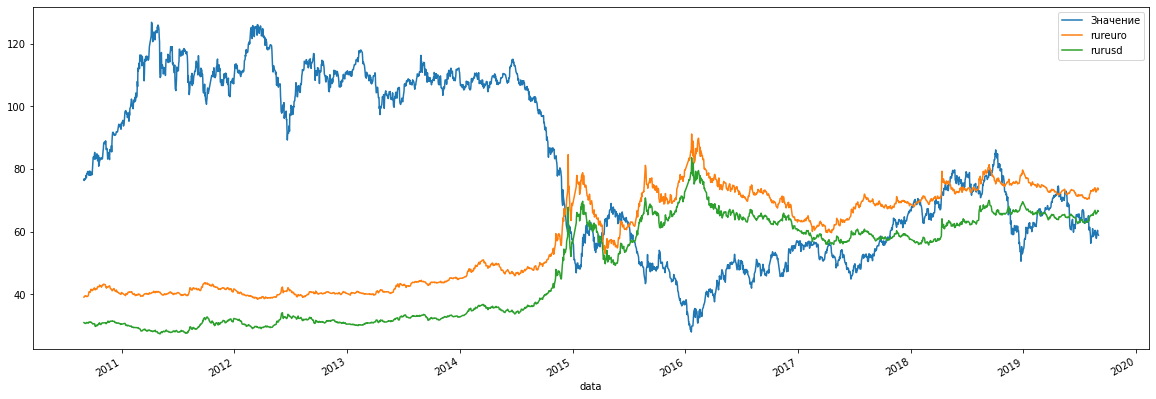

In [7]:
plt.figure(figsize=(20, 7))
brent_data['Значение'].plot()
rur_euro['rureuro'].plot()
rur_usd['rurusd'].plot()
plt.legend()
plt.show()

In [8]:
data = brent_data['Значение']
data = pd.concat([data, rur_usd, rur_euro], axis=1)
data

,Значение,rurusd,rureuro
2010-09-01,76.37,30.8669,39.0127
2010-09-02,76.89,30.8001,39.1654
2010-09-03,76.57,30.6858,39.2901
2010-09-04,76.62,30.6922,39.3505
2010-09-05,76.63,NaN,NaN
...,...,...,...
2019-08-28,59.84,66.2608,73.6091
2019-08-29,60.37,66.4127,73.6583
2019-08-30,59.19,66.7471,73.9558
2019-08-31,NaN,66.4897,73.3847


In [9]:
data.iloc[np.where(data['Значение'].isna() == True)[0],:]

,Значение,rurusd,rureuro
2010-09-18,NaN,31.0826,40.8115
2010-09-25,NaN,30.9480,41.2599
2010-10-02,NaN,30.5094,41.6606
2010-10-09,NaN,29.9086,41.6717
2010-10-16,NaN,30.1243,42.3939
...,...,...,...
2019-08-03,NaN,64.6423,71.7077
2019-08-10,NaN,65.2543,73.0196
2019-08-17,NaN,65.9961,73.2227
2019-08-24,NaN,65.6046,72.6243


In [10]:
data.iloc[np.where(data['rurusd'].isna() == True)[0],:]

,Значение,rurusd,rureuro
2010-09-05,76.63,NaN,NaN
2010-09-06,76.87,NaN,NaN
2010-09-13,79.19,NaN,NaN
2010-09-19,78.23,NaN,NaN
2010-09-20,79.36,NaN,NaN
...,...,...,...
2019-08-18,58.89,NaN,NaN
2019-08-19,59.74,NaN,NaN
2019-08-25,57.81,NaN,NaN
2019-08-26,58.26,NaN,NaN


In [11]:
data.iloc[np.where(data['rureuro'].isna() == True)[0],:]

,Значение,rurusd,rureuro
2010-09-05,76.63,NaN,NaN
2010-09-06,76.87,NaN,NaN
2010-09-13,79.19,NaN,NaN
2010-09-19,78.23,NaN,NaN
2010-09-20,79.36,NaN,NaN
...,...,...,...
2019-08-18,58.89,NaN,NaN
2019-08-19,59.74,NaN,NaN
2019-08-25,57.81,NaN,NaN
2019-08-26,58.26,NaN,NaN


In [12]:
data['rurusd'].fillna(method='ffill', inplace=True)
data['rureuro'].fillna(method='ffill', inplace=True)
data['Значение'].fillna(method='ffill', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3137 entries, 2010-09-01 to 2019-09-01
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  3137 non-null   float64
 1   rurusd    3137 non-null   float64
 2   rureuro   3137 non-null   float64
dtypes: float64(3)
memory usage: 98.0 KB


In [13]:
data = data.resample('w').mean()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2010-09-05 to 2019-09-01
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  470 non-null    float64
 1   rurusd    470 non-null    float64
 2   rureuro   470 non-null    float64
dtypes: float64(3)
memory usage: 14.7 KB


In [14]:
data['d_brent'] = data['Значение'].diff(1)
data['d_usd'] = data['rurusd'].diff(1)
data['d_euro'] = data['rureuro'].diff(1)
data.dropna(inplace=True)
data

,Значение,rurusd,rureuro,d_brent,d_usd,d_euro
2010-09-12,77.673333,30.777050,39.302883,1.057333,0.029610,0.069043
2010-09-19,78.590000,30.887129,39.984557,0.916667,0.110079,0.681674
2010-09-26,78.558571,31.003800,41.040657,-0.031429,0.116671,1.056100
2010-10-03,81.582857,30.585086,41.382686,3.024286,-0.418714,0.342029
2010-10-10,84.152857,30.112129,41.636057,2.570000,-0.472957,0.253371
...,...,...,...,...,...,...
2019-08-04,62.560000,63.794714,70.882043,-0.751429,0.723171,0.407214
2019-08-11,58.262857,65.090229,72.732529,-4.297143,1.295514,1.850486
2019-08-18,58.977143,65.624400,73.194529,0.714286,0.534171,0.462000
2019-08-25,59.415714,66.068586,73.246629,0.438571,0.444186,0.052100


In [15]:
print(adfuller(data['d_brent'], regression='ctt'),
      adfuller(data['d_usd'], regression='ctt'),
      adfuller(data['d_euro'], regression='ctt'), sep='\n')

(-13.687495282868726, 2.532471418398957e-22, 1, 467, {'1%': -4.396111652921828, '5%': -3.84509447012365, '10%': -3.5611212965378463}, 1975.107911794324)
(-8.233816237124346, 8.991463748790358e-11, 3, 465, {'1%': -4.396219838735785, '5%': -3.845149370443721, '10%': -3.5611552188045854}, 1258.1372660285142)
(-8.222711673081994, 9.571700196296866e-11, 3, 465, {'1%': -4.396219838735785, '5%': -3.845149370443721, '10%': -3.5611552188045854}, 1431.464303264252)


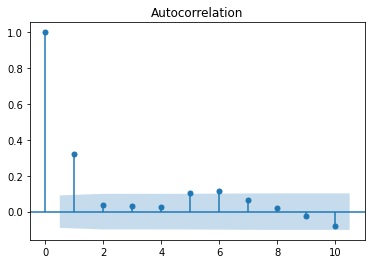

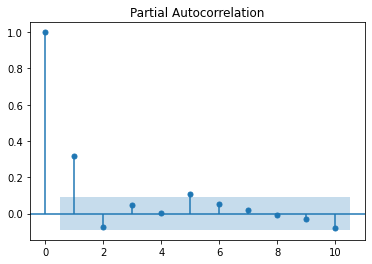

In [16]:
plot_acf(data['d_brent'], lags=10)
plt.show()

plot_pacf(data['d_brent'], lags=10)
plt.show()

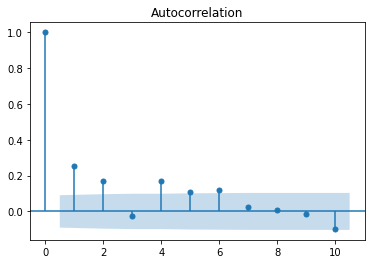

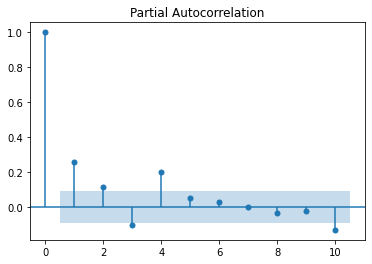

In [17]:
plot_acf(data['d_usd'], lags=10)
plt.show()

plot_pacf(data['d_usd'], lags=10)
plt.show()

In [18]:
data

,Значение,rurusd,rureuro,d_brent,d_usd,d_euro
2010-09-12,77.673333,30.777050,39.302883,1.057333,0.029610,0.069043
2010-09-19,78.590000,30.887129,39.984557,0.916667,0.110079,0.681674
2010-09-26,78.558571,31.003800,41.040657,-0.031429,0.116671,1.056100
2010-10-03,81.582857,30.585086,41.382686,3.024286,-0.418714,0.342029
2010-10-10,84.152857,30.112129,41.636057,2.570000,-0.472957,0.253371
...,...,...,...,...,...,...
2019-08-04,62.560000,63.794714,70.882043,-0.751429,0.723171,0.407214
2019-08-11,58.262857,65.090229,72.732529,-4.297143,1.295514,1.850486
2019-08-18,58.977143,65.624400,73.194529,0.714286,0.534171,0.462000
2019-08-25,59.415714,66.068586,73.246629,0.438571,0.444186,0.052100


## 5. Постройте модель предсказания 1-й точки от текущей (h=1).

In [19]:
S = range(0, 2)
D = range(0, 2)
P = range(0, 2)
Q = range(0, 2)

PDQS_list = list(product(P, D, Q, S))
PDQS_list

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [20]:
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)

# parameters = [[0,0,0,0]]
pdq_list = list(product(p, d, q))
pdq_list

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [25]:
results = []
opt_aic = float('inf')
warnings.filterwarnings('ignore')

for n, param in enumerate(pdq_list):
#     try:
    model=SARIMAX(data['Значение'].values, order=param, 
                  seasonal_order=(0,0,0,0), 
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit(disp=-1)
#     except:
#         continue
    print(model.aic)
    aic = model.aic
    if aic < opt_aic:
        opt_model = model
        opt_aic = aic
        opt_param = param
    results.append([param, model.aic])
    
# warnings.filterwarnings('default')

5489.260800430916
nan
2093.383152356225
2038.5563295352729
2098.6763344241654
2043.6507462654872
2045.329928352583
2040.4610640798828


In [26]:
result_table = pd.DataFrame(results, columns=['parameters', 'aic'])
result_table.sort_values(by='aic', ascending=True)

,parameters,aic
3,"(0, 1, 1)",2038.556330
7,"(1, 1, 1)",2040.461064
5,"(1, 0, 1)",2043.650746
6,"(1, 1, 0)",2045.329928
2,"(0, 1, 0)",2093.383152
4,"(1, 0, 0)",2098.676334
0,"(0, 0, 0)",5489.260800
1,"(0, 0, 1)",NaN


In [27]:
opt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  469
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1017.278
Date:                Wed, 18 Nov 2020   AIC                           2038.556
Time:                        13:56:16   BIC                           2046.845
Sample:                             0   HQIC                          2041.818
                                - 469                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3438      0.044      7.728      0.000       0.257       0.431
sigma2         4.6095      0.240     19.171      0.000       4.138       5.081
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                27.95
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

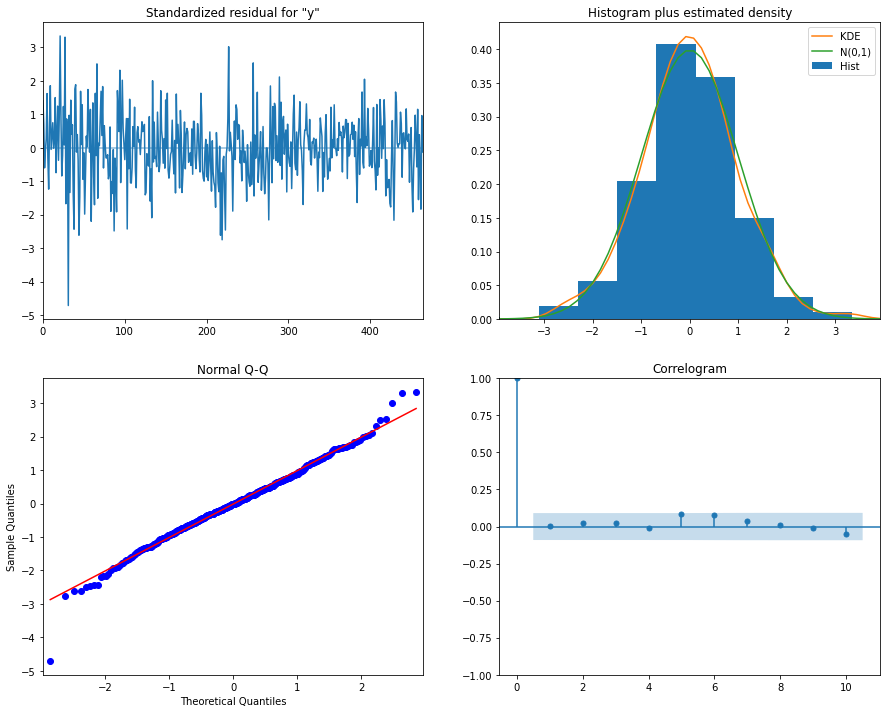

In [28]:
opt_model.plot_diagnostics(figsize=(15, 12))
plt.show()

## 6. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

достроить мождели и сравнить ещё предстоит впереди...